In [2]:
import numpy as np
from landlab.io import read_esri_ascii

# Landtype Classifications and Associated Numbers in the NLCD:

    0: "Unclassified",
    11: "Open Water",
    12: "Perennial Ice/Snow",
    21: "Developed, Open",
    22: "Developed, Low Intensity",
    23: "Developed, Medium Intensity",
    24: "Developed, High Intensity",
    31: "Barren Land (Rock/Sand/Clay)",
    41: "Deciduous Forest",
    42: "Evergreen Forest",
    43: "Mixed Forest",
    52: "Shrub/Scrub",
    71: "Grassland/Herbaceous",
    81: "Pasture/Hay",
    82: "Cultivated Crops",
    90: "Woody Wetlands",
    95: "Emergent Herbaceous Wetlands",

In [3]:
(lcmg, C) = read_esri_ascii('nlcd_30m.asc', name = 'landcover') 

Finding coverage percentages of the landtypes in the North Fork Nooksack River Basin

In [3]:

Unclassified = np.count_nonzero(np.where(C == 0))
print('% Unclassified nodes:', Unclassified)
Open_Water = np.round((np.count_nonzero(np.where(C == 11))/830781)*100, 3)
print('% Open_Water nodes:', Open_Water)
Perennial_Ice_Snow = np.round((np.count_nonzero(np.where(C == 12))/830781)*100,3)
print('% Perennial Ice/Snow nodes:', Perennial_Ice_Snow)
Developed_Open = np.round((np.count_nonzero(np.where(C == 21))/830781)*100,3)
print('% Developed_Open nodes:', Developed_Open)
Developed_Low_Intensity = np.round((np.count_nonzero(np.where(C == 22))/830781)*100,3)
print('% Developed_Low_Intensity nodes:', Developed_Low_Intensity)
Developed_Medium_Intensity = np.round((np.count_nonzero(np.where(C == 23))/830781)*100,3)
print('% Developed_Medium_Intensity nodes:', Developed_Medium_Intensity)
Developed_High_Intensity = np.round((np.count_nonzero(np.where(C == 24))/830781)*100,3)
print('% Developed_High_Intensity nodes:', Developed_High_Intensity)
BarrenLand_RockSandClay = np.round((np.count_nonzero(np.where(C == 31))/830781)*100,3)
print('% BarrenLand_RockSandClay nodes:', BarrenLand_RockSandClay)
Deciduous_Forest = np.round((np.count_nonzero(np.where(C == 41))/830781)*100,3)
print('% Deciduous_Forest nodes:', Deciduous_Forest)
Evergreen_Forest = np.round((np.count_nonzero(np.where(C == 42))/830781)*100,3)
print('% Evergreen_Forest nodes:', Evergreen_Forest)
Mixed_Forest = np.round((np.count_nonzero(np.where(C == 43))/830781)*100,3)
print('% Mixed_Forest nodes:', Mixed_Forest)
Shrub_Scrub = np.round((np.count_nonzero(np.where(C == 52))/830781)*100,3)
print('% Shrub_Scrub nodes:', Shrub_Scrub)
Grassland_Herbaceous = np.round((np.count_nonzero(np.where(C == 71))/830781)*100,3)
print('% Grassland_Herbaceous nodes:', Grassland_Herbaceous)
Pasture_Hay = np.round((np.count_nonzero(np.where(C == 81))/830781)*100,3)
print('% Pasture_Hay nodes:', Pasture_Hay)
Cultivated_Crops = np.round((np.count_nonzero(np.where(C == 82))/830781)*100,3)
print('% Cultivated_Crops nodes:', Cultivated_Crops)
Woody_Wetlands = np.round((np.count_nonzero(np.where(C == 90))/830781)*100,3)
print('% Woody_Wetlands nodes:', Woody_Wetlands)
Emergent_Herbaceous_Wetlands = np.round((np.count_nonzero(np.where(C == 95))/830781)*100,3)
print('% Emergent_Herbaceous_Wetlands nodes:', Emergent_Herbaceous_Wetlands)

% Unclassified nodes: 0
% Open_Water nodes: 0.372
% Perennial Ice/Snow nodes: 2.359
% Developed_Open nodes: 1.468
% Developed_Low_Intensity nodes: 0.558
% Developed_Medium_Intensity nodes: 0.085
% Developed_High_Intensity nodes: 0.033
% BarrenLand_RockSandClay nodes: 5.572
% Deciduous_Forest nodes: 2.28
% Evergreen_Forest nodes: 66.183
% Mixed_Forest nodes: 5.335
% Shrub_Scrub nodes: 11.777
% Grassland_Herbaceous nodes: 1.863
% Pasture_Hay nodes: 0.796
% Cultivated_Crops nodes: 0.001
% Woody_Wetlands nodes: 0.822
% Emergent_Herbaceous_Wetlands nodes: 0.495


In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
%matplotlib inline
import pylab
from landlab.plot.imshow import imshow_grid
from landlab.plot.imshow import imshow_grid_at_node

In [5]:
from matplotlib.colors import ListedColormap

In [1]:
# function to create a new array based on the values associated with the land types in the nooksack dem for maping and to assign root cohesion values
def rootcohesion(C, nd, ow, pis, do, dl, dm, dh, bl, df, ef, mf, ss, glh, ph, cc, ww, ehw): 
    nC = []
    for i in C:
        if i == -9999: # No Data
            nC.append(nd)
        if i == 11:    # Open_water
            nC.append(ow)
        if i == 12:    # Perennial Ice/Snow
            nC.append(pis)
        if i == 21:    # Developed_Open
            nC.append(do)
        if i == 22:    # Developed_Low
            nC.append(dl)
        if i == 23:    # Developed_Medium
            nC.append(dm)
        if i == 24:    # Developed_high
            nC.append(dh)
        if i == 31:    # Barren Land
            nC.append(bl)
        if i == 41:    # Deciduous Forest
            nC.append(df)
        if i == 42:    # Evergreen Forest
            nC.append(ef)
        if i == 43:    # Mixed Forest
            nC.append(mf)
        if i == 52:    #Shrub/Scrub
            nC.append(ss)
        if i == 71:    # Grassland/herbaceous
            nC.append(glh)
        if i == 81:    # Pasture/Hay
            nC.append(ph)
        if i == 82:    # Cultivated Crops
            nC.append(cc)
        if i == 90:    # Woody Wetlands
            nC.append(ww)
        if i == 95:    # Emergent Herbaceous Wetlands
            nC.append(ehw)
    return nC
    

In [15]:
nC = rootcohesion(C,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16)

In [13]:
lcmg.add_field('node', 'landcovercolor', nC)

array([0, 0, 0, ..., 0, 0, 0])

Looking at the land classification distribution on the map

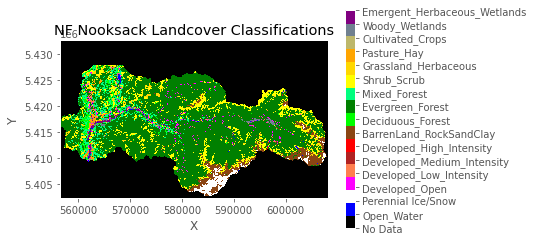

In [40]:
# Producing a basic color map locating the landuse types

imshow_grid(lcmg, 'landcovercolor', plot_name = 'NF Nooksack Landcover Classifications', 
            cmap = ListedColormap(['k',"blue", "white", "magenta", "coral", "firebrick",
                        "red", "saddlebrown", "lime", "green", "springgreen",
                        "yellow", "gold", "orange", "darkkhaki", "slategray",
                        "purple"], N =17),allow_colorbar= False)
cb = plt.colorbar()
cb.set_ticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
cb.set_ticklabels(['No Data', 'Open_Water','Perennial Ice/Snow','Developed_Open','Developed_Low_Intensity','Developed_Medium_Intensity',
                  'Developed_High_Intensity','BarrenLand_RockSandClay', 'Deciduous_Forest','Evergreen_Forest','Mixed_Forest','Shrub_Scrub',
                  'Grassland_Herbaceous','Pasture_Hay','Cultivated_Crops','Woody_Wetlands','Emergent_Herbaceous_Wetlands'])
plt.show()

    

# 16 landtype classifications

* Open_Water: blue
* Perennial Ice/Snow nodes: white
* Developed_Open nodes: magenta
* Developed_Low_Intensity nodes: coral
* Developed_Medium_Intensity nodes: firebrick
* Developed_High_Intensity nodes: red
* BarrenLand_RockSandClay nodes: saddlebrown
* Deciduous_Forest nodes: lime
* Evergreen_Forest nodes: green
* Mixed_Forest nodes: springgreen
* Shrub_Scrub nodes: yellow
* Grassland_Herbaceous nodes: gold
* Pasture_Hay nodes: orange
* Cultivated_Crops nodes: darkkhaki
* Woody_Wetlands nodes: slategray
* Emergent_Herbaceous_Wetlands nodes:purple

(5409000.0, 5415000.0)

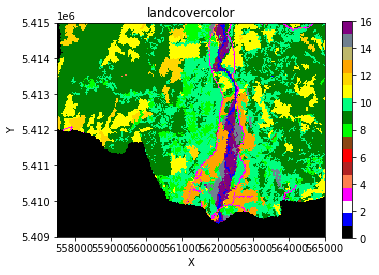

In [20]:
f, ax = plt.subplots()
imshow_grid_at_node(lcmg, 'landcovercolor', plot_name = 'NF Nooksack Landcover Classifications', 
            cmap = ListedColormap(['k',"blue", "white", "magenta", "coral", "firebrick",
                        "red", "saddlebrown", "lime", "green", "springgreen",
                        "yellow", "gold", "orange", "darkkhaki", "slategray",
                        "purple"], N =17))
ax.set_xlim([557500, 565000])
ax.set_ylim([5.409*10**6, 5.415*10**6])

(5415000.0, 5420000.0)

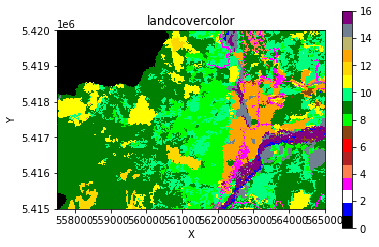

In [21]:
f, ax = plt.subplots()
imshow_grid_at_node(lcmg, 'landcovercolor', plot_name = 'NF Nooksack Landcover Classifications', 
            cmap = ListedColormap(['k',"blue", "white", "magenta", "coral", "firebrick",
                        "red", "saddlebrown", "lime", "green", "springgreen",
                        "yellow", "gold", "orange", "darkkhaki", "slategray",
                        "purple"], N =17))
ax.set_xlim([557500, 565000])
ax.set_ylim([5.415*10**6, 5.42*10**6])

In [19]:
from landlab.components.flow_accum import find_drainage_area_and_discharge
from landlab.components import FlowAccumulator, SinkFillerBarnes, DepressionFinderAndRouter
from landlab.components.landslides import LandslideProbability
import time
st = time.time()

Landslide Probability Model with root cohesion values from Ronda's Paper 
using the North Fork Nooksack nlcd.

In [20]:
(mg, Z) = read_esri_ascii('dem_30m.asc', name = 'topographic__elevation')

In [21]:
mg.set_nodata_nodes_to_closed(Z,-9999.)
outlet_id = mg.core_nodes[np.argmin(mg.at_node['topographic__elevation'][mg.core_nodes])]
mg.set_watershed_boundary_condition_outlet_id(outlet_id, Z)

Zmin = np.min(mg.at_node['topographic__elevation'][mg.core_nodes])
Zmax = np.max(mg.at_node['topographic__elevation'][mg.core_nodes])

print("Outlet ID=", outlet_id)                                        
print("Outlet elevation=",mg.at_node['topographic__elevation'][outlet_id])        
print("Min elevation of core nodes=", Zmin)
print("Max elevation of core nodes=", Zmax)

Outlet ID= 408536
Outlet elevation= 88.0
Min elevation of core nodes= 88.0
Max elevation of core nodes= 3235.0


C:\Users\Valued Customer\anaconda3\lib\site-packages\landlab\plot\imshow.py:267: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet"))
  cmap.set_bad(color=color_for_closed)


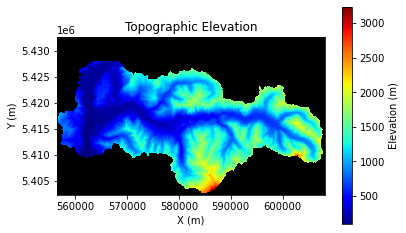

In [27]:
imshow_grid(mg,'topographic__elevation', plot_name = 'Topographic Elevation', 
            var_name = 'Elevation', var_units = 'm', grid_units = ('m','m'), 
            cmap = 'jet', limits = (88., 3235.))

In [22]:
fa = FlowAccumulator(mg,
                    surface = 'topographic__elevation',
                    flow_director = 'FlowDirectorD8',
                    runoff_rate = None,
                    depression_finder = 'DepressionFinderAndRouter')

(da, q) = fa.accumulate_flow()
print('max drainage area (km^2) =', np.max(mg.at_node['drainage_area'][mg.nodes])/1000000)

max drainage area (km^2) = 746.5617


In [23]:
sf = SinkFillerBarnes(mg, surface = 'topographic__elevation', method = 'D8', fill_flat = False, ignore_overfill = False)
sf.run_one_step()

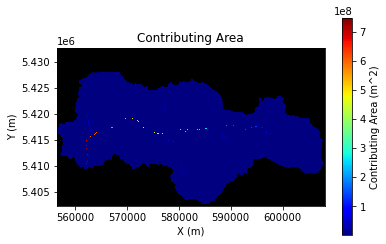

In [31]:
imshow_grid(mg,'drainage_area', plot_name = 'Contributing Area', 
            var_name = 'Contributing Area', var_units = 'm^2', grid_units = ('m','m'), 
            cmap = 'jet')

(5416000.0, 5419000.0)

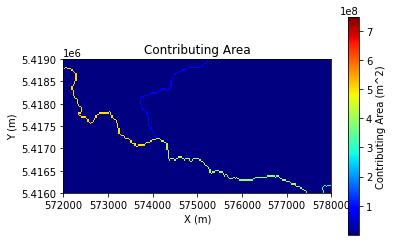

In [34]:
f, ax = plt.subplots()
imshow_grid(mg,'drainage_area', plot_name = 'Contributing Area', 
            var_name = 'Contributing Area', var_units = 'm^2', grid_units = ('m','m'), 
            cmap = 'jet')
ax.set_xlim([572000, 578000])
ax.set_ylim([5.416*10**6, 5.419*10**6])

<ipython-input-35-30d60b6c407d>:1: RuntimeWarning: divide by zero encountered in log10
  imshow_grid(mg, np.log10(da), plot_name = 'Catchment Area',


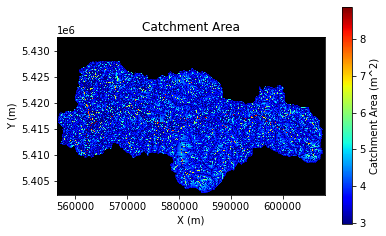

In [35]:
imshow_grid(mg, np.log10(da), plot_name = 'Catchment Area', 
            var_name = 'Catchment Area', var_units = 'm^2', grid_units = ('m','m'), 
            cmap = 'jet')

<ipython-input-36-f132df3aba26>:2: RuntimeWarning: divide by zero encountered in log10
  imshow_grid(mg, np.log10(da), plot_name = 'Catchment Area',


(5416000.0, 5419000.0)

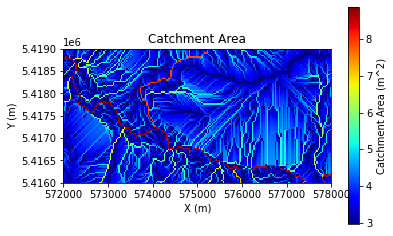

In [36]:
f, ax = plt.subplots()
imshow_grid(mg, np.log10(da), plot_name = 'Catchment Area', 
            var_name = 'Catchment Area', var_units = 'm^2', grid_units = ('m','m'), 
            cmap = 'jet')
ax.set_xlim([572000, 578000])
ax.set_ylim([5.416*10**6, 5.419*10**6])

Calculating Specific Catchment Area and Slope

In [24]:
cell_width = mg.dx
ca = mg.at_node['drainage_area']/cell_width
_=mg.add_field('node', 'topographic__specific_contributing_area', ca, clobber=True)
slope = mg.calc_slope_at_node(Z)
_= mg.add_field('node', 'topographic__slope', slope, clobber = True)

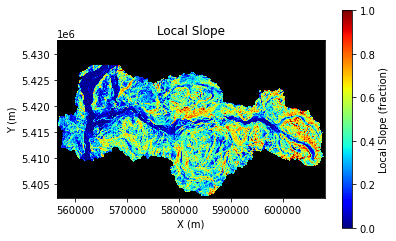

In [44]:
imshow_grid(mg,'topographic__slope', plot_name = 'Local Slope', 
            var_name = 'Local Slope', var_units = 'fraction', grid_units = ('m','m'), 
            cmap = 'jet', limits = (0, 1))

In [45]:
sorted(LandslideProbability.input_var_names)

['soil__density',
 'soil__internal_friction_angle',
 'soil__maximum_total_cohesion',
 'soil__minimum_total_cohesion',
 'soil__mode_total_cohesion',
 'soil__saturated_hydraulic_conductivity',
 'soil__thickness',
 'soil__transmissivity',
 'topographic__slope',
 'topographic__specific_contributing_area']

In [46]:
print('soil mode total cohesion :', LandslideProbability.var_units('soil__mode_total_cohesion'))
print('saturated hydraulic conductivity :', LandslideProbability.var_units('soil__saturated_hydraulic_conductivity'))
print('soil transmissivity :', LandslideProbability.var_units('soil__transmissivity'))
print('soil internal friction angle :', LandslideProbability.var_units('soil__internal_friction_angle'))

soil mode total cohesion : Pa or kg/m-s2
saturated hydraulic conductivity : m/day
soil transmissivity : m2/day
soil internal friction angle : degrees


Using the nlcd dem to assign minimum, maximum, and mode cohesion values based on the four Root cohesion variables used in Ronda's paper. 
Unit = kPa
* Barren/developed: min = 0.03, mode = 0.10, max = 0.15
    * Developed (open, low, medium, and high intensity), Barren Land, Perennial Ice/Snow, Open Water
* Forest(coniferous): min = 3, mode = 10, max = 20
    * Deciduous, Evergreen, and Mixed Forest
* Shrubland: min = 1.2, mode = 4, max = 10
    * Shrub/Scrub, Woody Wetlands
* Herbaceous: min = 0.6, mode = 2, max = 5
    * Grassland/herbaceous, Pasture/Hay, Cultivated Crops, Emergent Herbaceous Wetlands


In [25]:
C_min = rootcohesion(C,-9999.,0.03,0.03,0.03,0.03,0.03,0.03,0.03,3,3,3,1.2,0.6,0.6,0.6,0.6,1.2)


Adding the minimum root cohesion field to the grid

In [26]:
mg.add_field('node', 'soil__minimum_total_cohesion', C_min, clobber=True)

array([-9999., -9999., -9999., ..., -9999., -9999., -9999.])

In [27]:
Cmode = rootcohesion(C,-9999.,0.1,0.1,0.1,0.1,0.1,0.1,0.1,10,10,10,4,2,2,2,2,4)

Adding the mode root cohesion field to the grid

In [28]:
mg.add_field('node', 'soil__mode_total_cohesion', Cmode, clobber=True)

array([-9999., -9999., -9999., ..., -9999., -9999., -9999.])

In [29]:
C_max = rootcohesion(C,-9999.,0.15,0.15,0.15,0.15,0.15,0.15,0.15,20,20,20,10,5,5,5,5,10)

Adding the maximum root cohesion field to the grid

In [30]:
mg.add_field('node', 'soil__maximum_total_cohesion', C_max, clobber=True)

array([-9999., -9999., -9999., ..., -9999., -9999., -9999.])

Defining the other variables based on the values used in Ronda's paper, though in the landslide probability tutorial notebook just a hs max, hs min, and one soil internal friction angle are used. In the paper, Table 1. there is a minimum, mode, and maximum are given for each variable and there are three soil catagories with different internal friction angle ranges. 

In [31]:
Phi = 35  # degrees, using the average of the mode values in Ronda's paper
Ks =  7   # m d^-1, value in Ronda's paper
hs_min = 0.09  # m, minimum in Ronda's paper
hs_max = 2.01  # m, maximum in Ronda's paper
soil_density = 2000 # kg m^-3, used in Ronda's, is default in a different model cited in the paper


In [32]:
mg.add_field('node', 'soil__density', soil_density*np.ones(mg.number_of_nodes), clobber=True)
mg.add_field('node', 'soil__internal_friction_angle', Phi*np.ones(mg.number_of_nodes), clobber=True)
mg.add_field('node', 'soil__saturated_hydraulic_conductivity', Ks*np.ones(mg.number_of_nodes), clobber=True)

array([ 7.,  7.,  7., ...,  7.,  7.,  7.])

Soil Depth 

In [33]:
hs=hs_max-((Z-Zmin)/(Zmax-Zmin))*(hs_max-hs_min)
_=mg.add_field('node', 'soil__thickness', hs*np.ones(mg.number_of_nodes), clobber=True)

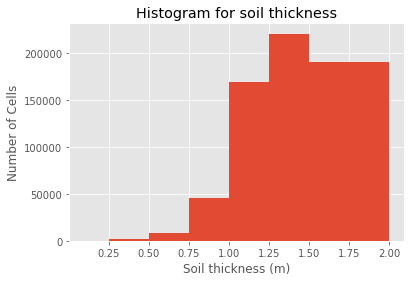

In [34]:
prob = mg.at_node['soil__thickness']
plt.style.use('ggplot')
plt.hist(prob, bins=[0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2])
plt.xlabel('Soil thickness (m)')
plt.ylabel ('Number of Cells')
plt.title('Histogram for soil thickness')
plt.ylim = 100000
plt.show()

C:\Users\Valued Customer\anaconda3\lib\site-packages\landlab\plot\imshow.py:267: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("copper_r"))
  cmap.set_bad(color=color_for_closed)
C:\Users\Valued Customer\anaconda3\lib\site-packages\landlab\plot\imshow.py:307: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(norm=norm, shrink=shrink)


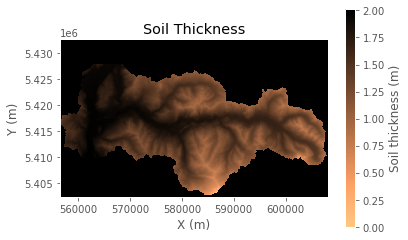

In [70]:
imshow_grid(mg,'soil__thickness', plot_name = 'Soil Thickness', 
            var_name = 'Soil thickness', var_units = 'm', grid_units = ('m','m'), 
            cmap = 'copper_r',limits = (0, 2.01))

Soil mode total cohesion

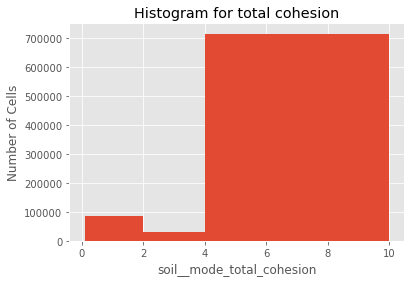

In [74]:
prob = mg.at_node['soil__mode_total_cohesion']
plt.style.use('ggplot')
plt.hist(prob, bins=[0.1, 2, 4, 10])
plt.xlabel('soil__mode_total_cohesion')
plt.ylabel ('Number of Cells')
plt.title('Histogram for total cohesion')
plt.show()

C:\Users\Valued Customer\anaconda3\lib\site-packages\landlab\plot\imshow.py:267: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("Greens"))
  cmap.set_bad(color=color_for_closed)
C:\Users\Valued Customer\anaconda3\lib\site-packages\landlab\plot\imshow.py:307: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(norm=norm, shrink=shrink)


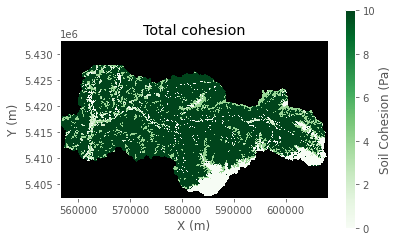

In [35]:
imshow_grid(mg,'soil__mode_total_cohesion', plot_name = 'Total cohesion', 
            var_name = 'Soil Cohesion', var_units = 'Pa', grid_units = ('m','m'), 
            cmap = 'Greens',limits = (0, 10))

Transmissivity

In [36]:
To=Ks*hs
_=mg.add_field('node', 'soil__transmissivity', To*np.ones(mg.number_of_nodes), clobber=True)

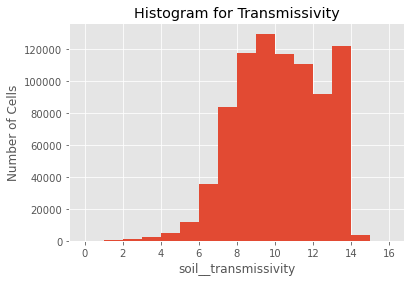

In [81]:
prob = mg.at_node['soil__transmissivity']
plt.style.use('ggplot')
plt.hist(prob, bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])
plt.xlabel('soil__transmissivity')
plt.ylabel ('Number of Cells')
plt.title('Histogram for Transmissivity')
plt.ylim = 100000
plt.show()

C:\Users\Valued Customer\anaconda3\lib\site-packages\landlab\plot\imshow.py:267: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("Greens"))
  cmap.set_bad(color=color_for_closed)
C:\Users\Valued Customer\anaconda3\lib\site-packages\landlab\plot\imshow.py:307: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(norm=norm, shrink=shrink)


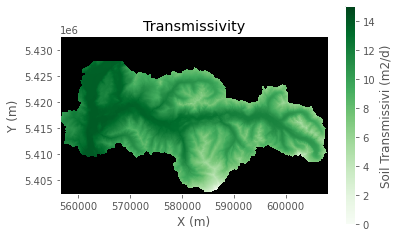

In [82]:
imshow_grid(mg,'soil__transmissivity', plot_name = 'Transmissivity', 
            var_name = 'Soil Transmissivi', var_units = 'm2/d', grid_units = ('m','m'), 
            cmap = 'Greens',limits = (0, 15))

Need to find groundwater recharge values, possibly in ssurgo/web soil survey data

In [37]:
groundwater__recharge_mean=15; 
groundwater__recharge_standard_deviation=1; 
groundwater__recharge_minimum = 1.3 # recharge in mm/d
groundwater__recharge_maximum = 4.3

In [84]:
number_of_iterations = 500
LS_prob=LandslideProbability(mg,
                         number_of_iterations=number_of_iterations,
                         groundwater__recharge_distribution='lognormal',
                         groundwater__recharge_mean=groundwater__recharge_mean,
                         groundwater__recharge_standard_deviation=groundwater__recharge_standard_deviation)

In [85]:
LS_prob.calculate_landslide_probability()

C:\Users\Valued Customer\anaconda3\lib\site-packages\landlab\components\landslides\landslide_probability.py:552: RuntimeWarning: divide by zero encountered in float_scalars
  self._a / np.sin(np.arctan(self._theta))
C:\Users\Valued Customer\anaconda3\lib\site-packages\landlab\components\landslides\landslide_probability.py:567: RuntimeWarning: divide by zero encountered in true_divide
  self._FS = (self._C_dim / np.sin(np.arctan(self._theta))) + (
C:\Users\Valued Customer\anaconda3\lib\site-packages\landlab\components\landslides\landslide_probability.py:568: RuntimeWarning: divide by zero encountered in true_divide
  np.cos(np.arctan(self._theta)) * (Y / np.sin(np.arctan(self._theta)))


Relative Wetness

C:\Users\Valued Customer\anaconda3\lib\site-packages\landlab\plot\imshow.py:267: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("YlGnBu"))
  cmap.set_bad(color=color_for_closed)


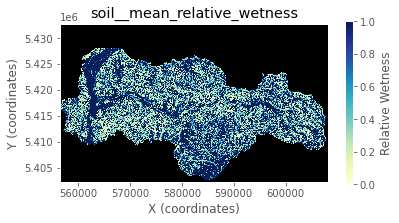

In [86]:
plt.figure('Mean Relative Wetness')
imshow_grid_at_node(mg, 'soil__mean_relative_wetness', cmap='YlGnBu',
                 grid_units=('coordinates', 'coordinates'),
                 shrink=0.75, var_name='Relative Wetness')

(5410000.0, 5420000.0)

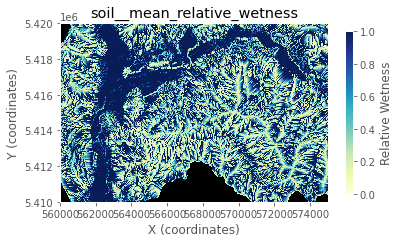

In [88]:
f, ax = plt.subplots()
imshow_grid_at_node(mg, 'soil__mean_relative_wetness', cmap='YlGnBu',
                 grid_units=('coordinates', 'coordinates'),
                 shrink=0.75, var_name='Relative Wetness')
ax.set_xlim([560000, 575000])
ax.set_ylim([5.410*10**6, 5.420*10**6])

Plotting probability of failure

C:\Users\Valued Customer\anaconda3\lib\site-packages\landlab\plot\imshow.py:267: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("OrRd"))
  cmap.set_bad(color=color_for_closed)


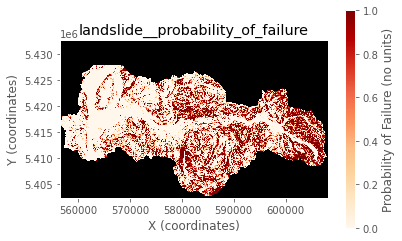

In [89]:
plt.figure('Probability of Failure')
imshow_grid_at_node(mg, 'landslide__probability_of_failure', cmap='OrRd',
                 grid_units=('coordinates', 'coordinates'), shrink=1,
                 var_name='Probability of Failure', var_units='no units')

(5410000.0, 5420000.0)

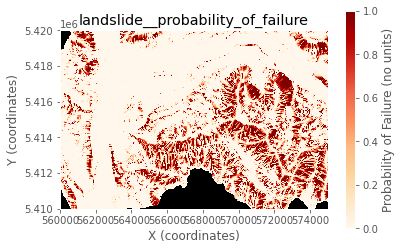

In [90]:
f, ax = plt.subplots()
imshow_grid_at_node(mg, 'landslide__probability_of_failure', cmap='OrRd',
                 grid_units=('coordinates', 'coordinates'), shrink=1,
                 var_name='Probability of Failure', var_units='no units')
ax.set_xlim([560000, 575000])
ax.set_ylim([5.410*10**6, 5.420*10**6])

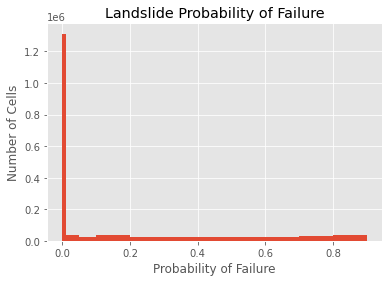

In [92]:
prob = mg.at_node['landslide__probability_of_failure']
plt.style.use('ggplot')
plt.hist(prob, bins=[0, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
plt.xlabel('Probability of Failure')
plt.ylabel ('Number of Cells')
plt.title('Landslide Probability of Failure')
plt.show()